# ***About Aerofit***

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# ***Problem Statement :***
The goal is to analyze customer characteristics and preferences to provide
actionable insights for better product recommendations and marketing strategies. By
understanding the factors influencing customer choices, AeroFit can tailor its marketing
efforts, product features, and pricing strategies to meet the diverse needs of its customer
base and enhance overall business performance.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 24.8MB/s]


In [65]:
df=pd.read_csv('aerofit_treadmill.csv')

# ***Basic Metric Analysis :***

In [66]:
df.shape #Number of rows

(180, 9)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [68]:
df.isna().sum() #Missing values in the dataset

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [69]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [70]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# ***OUTLIERS***

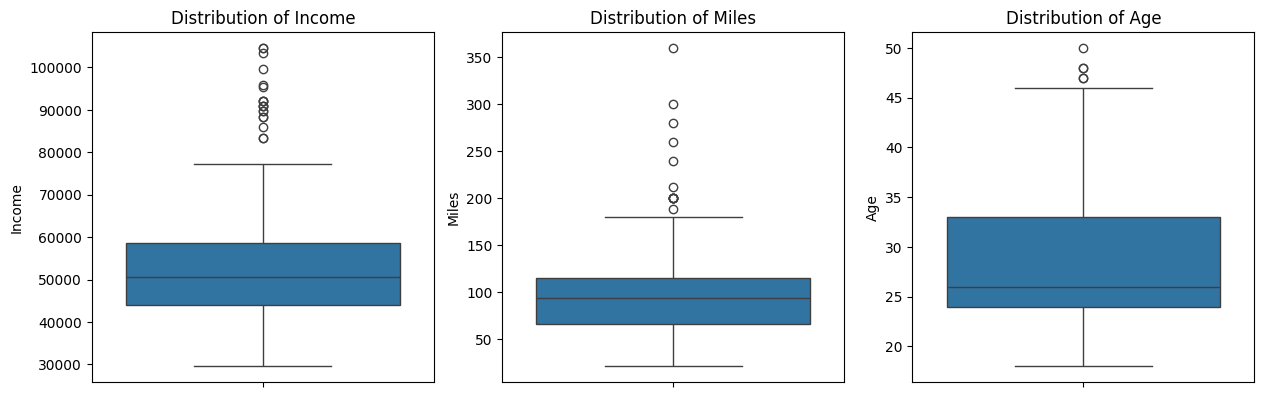

In [71]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df['Income'])
plt.title('Distribution of Income')

plt.subplot(2, 3, 2)
sns.boxplot(data=df['Miles'])
plt.title('Distribution of Miles')

plt.subplot(2, 3, 3)
sns.boxplot(data=df['Age'])
plt.title('Distribution of Age')

plt.show()

# ***Insights :***


*   As per the above box plots we can observe that we have outliers in Income,Miles and Age fields.
*   Since our dataset has only 180 data points/rows,it is not suggested to remove the outliers as we may miss out some of the categorical information.



# ***Customer Profiling - Categorization of users***

# ***Age Category***

Creating a new categorical attribute based on Age such as Young Adult, Middle-Aged
Adult and Older Adult.

In [72]:
def age_cat(x):
  if x>=18 and x<=30:
    return 'Young Adult'
  elif x>=31 and x<=50:
    return 'Middle-aged Adult'
  elif x>50:
    return 'Older Adult'

In [73]:
df['Age_Category'] = df['Age'].apply(lambda x: age_cat(x))

In [74]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult


# ***Income Category***

Creating a new categorical attribute based on Income such as Low Income, Middle Income
and High Income.

In [75]:
def income_cat(x):
  if x<30000:
    return 'Low Income'
  elif x>30000 and x<=60000:
    return 'Middle Income'
  elif x>60000:
    return 'High Income'

In [76]:
df['Income_Category'] = df['Income'].apply(lambda x: income_cat(x))

In [77]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult,Middle Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult,Middle Income
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult,Middle Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult,Middle Income


# **Fitness Category**

Creating a new categorical attribute based on Fitness such as poor, fair, good and excellent.

In [78]:
def fit_cat(x):
  if x>=1 and x<=2:
    return 'Poor'
  elif x==3:
    return 'Fair'
  elif x==4:
    return 'Good'
  elif x==5:
    return 'Excellent'

In [79]:
df['Fitness_Category'] = df['Fitness'].apply(lambda x: fit_cat(x))

In [80]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Fitness_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult,Low Income,Good
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult,Middle Income,Fair
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult,Middle Income,Fair
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult,Middle Income,Fair
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult,Middle Income,Poor


# **Usage Categories**
Creating a new categorical attribute based on product usage such as low, moderate and high.

In [81]:
def usage_cat(x):
  if x>=1 and x<=2:
    return 'Low Usage'
  elif x>=3 and x<=4:
    return 'Moderate Usage'
  elif x>=5:
    return 'High Usage'

In [82]:
df['Usage_Category'] = df['Usage'].apply(lambda x: usage_cat(x))

In [83]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Fitness_Category,Usage_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult,Low Income,Good,Moderate Usage
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult,Middle Income,Fair,Low Usage
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult,Middle Income,Fair,Moderate Usage
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult,Middle Income,Fair,Moderate Usage
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult,Middle Income,Poor,Moderate Usage


# **Education Category**
Creating a new categorical attribute based on Education such as Not graduated, educated
and highly educated.

In [84]:
def edu_cat(x):
  if x<12:
    return 'Not Graduated'
  elif x>=12 and x<=16:
    return 'Educated'
  elif x>16:
    return 'Highly Educated'

In [85]:
df['Education_Category'] = df['Education'].apply(lambda x: edu_cat(x))

In [86]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Fitness_Category,Usage_Category,Education_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult,Low Income,Good,Moderate Usage,Educated
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult,Middle Income,Fair,Low Usage,Educated
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult,Middle Income,Fair,Moderate Usage,Educated
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult,Middle Income,Fair,Moderate Usage,Educated
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult,Middle Income,Poor,Moderate Usage,Educated


## **Visual Analysis**

Text(0.5, 1.0, 'Age Distribution of Customers')

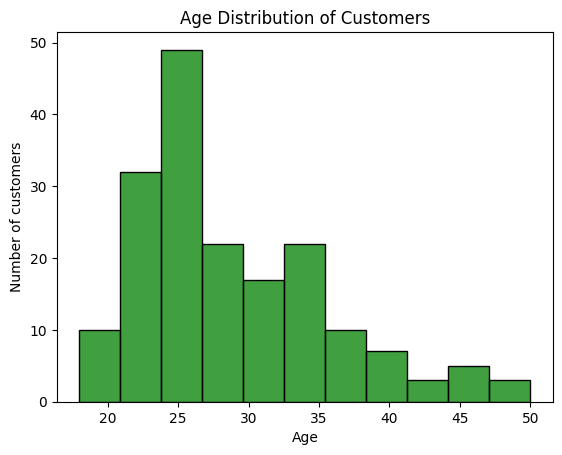

In [87]:
sns.histplot(data = df['Age'],color = 'g')
plt.ylabel('Number of customers')
plt.title('Age Distribution of Customers')

**Insights :**


*   Based on the above histogram plot we can observe that most number of users are between the
age of 20 to 25.
*  Customers seem to be predominantly young adults and middle-aged adults.


*   There is a peak in the distribution around 20-25 years old, suggesting that this age group might
be a core target market for AeroFit treadmills.

**Recommendations :**


*   Consider segmenting marketing campaigns to attract middle-aged adults and older adults.
*   Explore offering additional features that might appeal to middle-aged customers by partnering
with fitness instructors to create treadmill workout videos.

**Distribution of Products Purchased by Gender**

Text(0, 0.5, 'Number of customers')

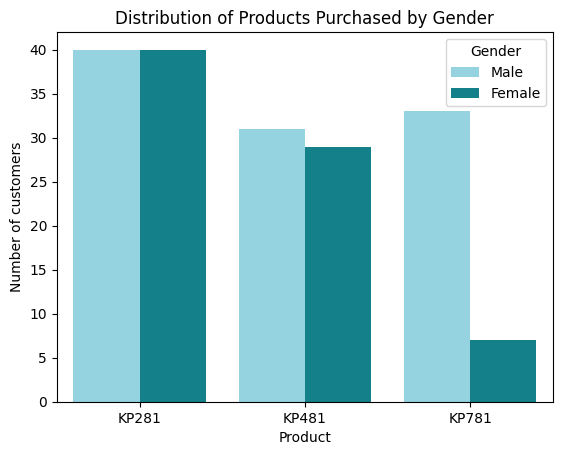

In [88]:
hue_colors = {"Male": "#89dbec", "Female": "#00909e"}
sns.countplot(data=df,x = df['Product'],hue='Gender',palette=hue_colors)
plt.title('Distribution of Products Purchased by Gender')
plt.ylabel('Number of customers')

**Insights :**


*   Based on the above count plot we can observe that KP281 has equal number of male and female
customers.
*   Male customers are dominating across the three products.

**Recommendations :**


*   Since the entry-level treadmill (KP281) has a balanced customer base, maintain a gender-neutral
marketing approach that highlights affordability, ease of use, and general fitness benefits.
*   **Marketing for KP481 and KP781:**
1. **Male :** Continue to emphasize performance, durability, speed & incline options and explore new
features to add in the treadmill.
2. **Female :** Expand marketing for these treadmills to target women by showcasing programmed
workout routines for various fitness goals, weight loss tracking features to attract the female
customers.Conduct focus groups or surveys to understand the specific needs and preferences of
both female treadmill buyers.

**Distribution of Products Purchased by Marital Status**

Text(0, 0.5, 'Number of customers')

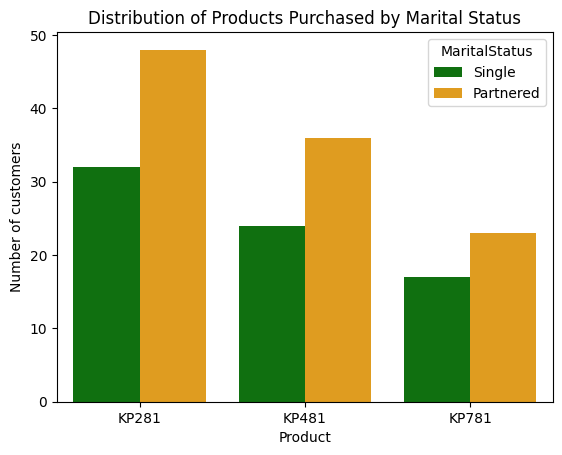

In [89]:
hue_colors = {"Single": "green", "Partnered": "orange"}
sns.countplot(data=df,x = df['Product'],hue='MaritalStatus',palette = hue_colors)
plt.title('Distribution of Products Purchased by Marital Status')
plt.ylabel('Number of customers')

**Insights :**


*   Based on the above count plot we can observe that Partnered customers seem to be more
interested in purchasing treadmills compared to single customers.
*   Couples might be looking to improve their fitness together, making a treadmill a more appealing
investment for their household.

**Recommendations :**


*   Showcase couples using the treadmills together in marketing materials. Promote the benefits of
working out at home as a couple.
*   Consider offering features that cater to single customers, such as pre-programmed workout
routines for different fitness levels.

**Distribution of Income for Each Product Purchased by MaritalStatus**

Text(0.5, 1.0, 'Distribution of Income for Each Product Purchased by MaritalStatus')

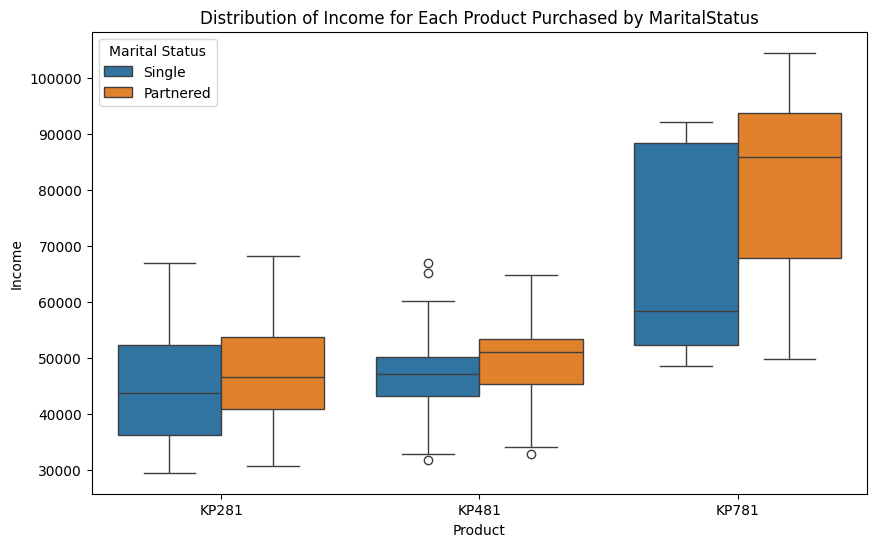

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product', y='Income', hue='MaritalStatus')
plt.legend(loc='upper left',title='Marital Status')
plt.title('Distribution of Income for Each Product Purchased by MaritalStatus')

**Insights :**


*   Product KP781 is only purchased by customers who fall into High income category.
*   Product KP481 is mostly purchased by customers who fall into Middle income category.
*  Product KP281 is mostly purchased by customers who fall into Low income category.





**Distribution of Age for Each Product Purchased**

Text(0.5, 1.0, 'Distribution of Age for Each Product Purchased')

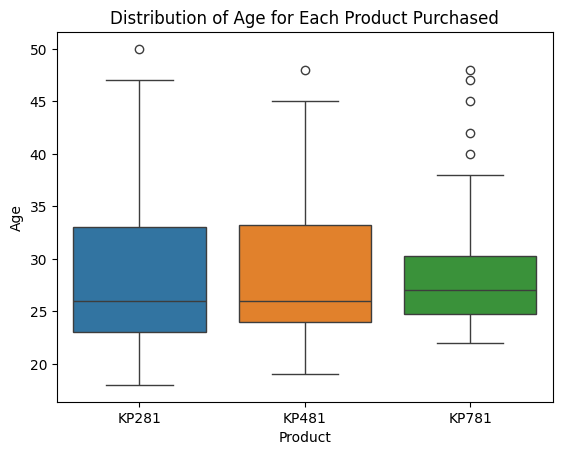

In [91]:
sns.boxplot(data=df,x=df['Product'], y=df['Age'],hue='Product')
plt.title('Distribution of Age for Each Product Purchased')

**Insights :**

The median age is similar for all three products.This suggests that AeroFit can target a similar
demographic for all three treadmills in terms of age.

**Recommendations :**

Since there's no significant difference in age distribution across treadmills, focus marketing
efforts on highlighting the unique features and benefits of each treadmill to target the right
customer. For KP781, emphasize its advanced features that might appeal to a tech-savvy
audience or those seeking a more challenging workout experience.

In [92]:
cat = df['Fitness_Category'].value_counts()

<ipython-input-93-ff8a4682fe61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat.values, y=cat.index,orient='h', palette=colors,errorbar=None)


Text(0.5, 1.0, 'Distribution of Customers by their Fitness')

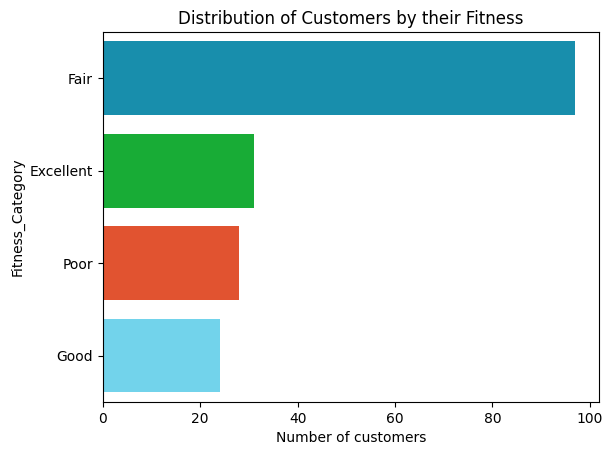

In [93]:
colors = {"Excellent": "#00c427", "Fair": "#009dc4","Good":"#5edfff","Poor":"#ff4112"}
sns.barplot(x=cat.values, y=cat.index,orient='h', palette=colors,errorbar=None)
plt.xlabel('Number of customers')
plt.title('Distribution of Customers by their Fitness')

**Insights :**


*   Based on the above bar plot we can observe that most customers seem to have fair fitness level
and we have customers with poor fitness as well.
*   However,we can note that most of the customers fitness level ranges between 3 to 5 and only a
few customers have poor fitness.

**Recommendations :**


*   Target a marketing campaign to increase the awareness about the effects of having poor fitness
and promote short videos on basic workout routines to attract poor fitness customers.
*   Explore various features to attract customers having fair and good fitness to level up their fitness
journey

**Distribution of Age for Each Product Purchased**

Text(0.5, 1.0, 'Distribution of Age for Each Product Purchased')

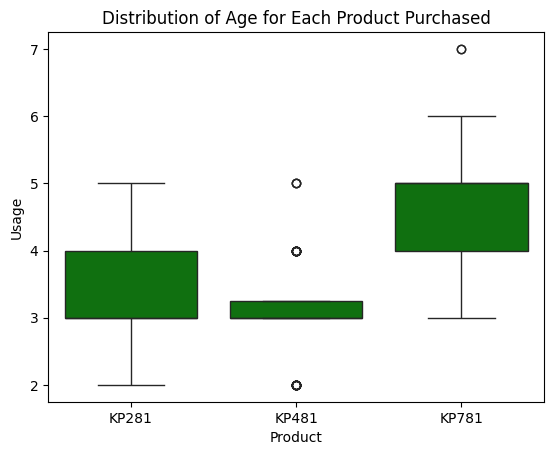

In [94]:
sns.boxplot(data=df,x=df['Product'], y=df['Usage'],color='g')
plt.title('Distribution of Age for Each Product Purchased')

In [95]:
df.groupby('Product')['Usage'].describe()

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,3.087500,0.782624,2.0,3.0,3.0,4.00,5.0
KP481,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
KP781,40.0,4.775000,0.946993,3.0,4.0,5.0,5.00,7.0


**Insights :**


*   KP781 has the highest usage among the other two products.


**Distribution of Income by Miles**

Text(0.5, 1.0, 'Distribution of Income by Miles')

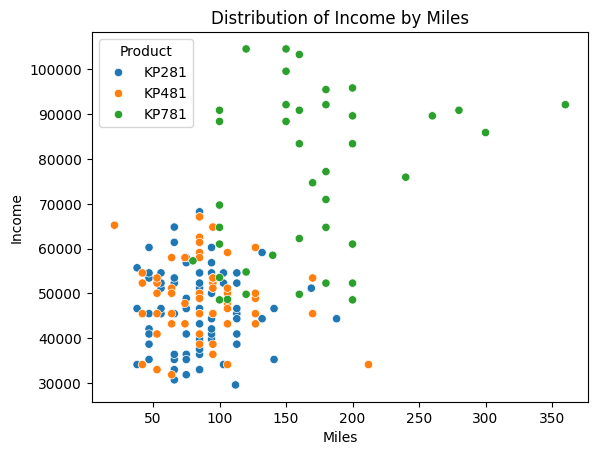

In [96]:
sns.scatterplot(data=df, x='Miles', y='Income',hue='Product' )
plt.title('Distribution of Income by Miles')

**Insights :**


*   People with high income tend to run more miles than the customers with middle and lower income category.
*   People who tend to run more miles purchased the product KP781.



# **Marginal Probability**

In [97]:
marginal_prob = pd.crosstab(index=df['Gender'],columns=df['Product'], normalize='index',margins = True) * 100
marginal_prob

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


**Insights :**
Product KP281 has the highest marginal probability percentage
followed by KP481 with females leading in the both the products.

# **Conditional Probability**

In [98]:
# The probability of customer buying a KP781 treadmill based on Gender
prob_KP781_and_male = len(df[(df['Product'] == 'KP781') & (df['Gender'] == 'Male')]) / len(df[df['Gender'] == 'Male'])
prob_KP781_and_Female = len(df[(df['Product'] == 'KP781') & (df['Gender'] == 'Female')]) / len(df[df['Gender'] == 'Female'])

print("The probability of customer buying a KP781 treadmill based on Gender")
print("Probability of a male customer buying a KP781 treadmill:", round(prob_KP781_and_male,2))
print("Probability of a Female customer buying a KP781 treadmill:", round(prob_KP781_and_Female,2))

The probability of customer buying a KP781 treadmill based on Gender
Probability of a male customer buying a KP781 treadmill: 0.32
Probability of a Female customer buying a KP781 treadmill: 0.09


In [99]:
#probability of a customer purchasing a KP481 treadmill belonging to Middle-aged Adult age group
prob_KP481_and_Middleage = len(df[(df['Product'] == 'KP481') & (df['Age_Category'] == 'Middle-aged Adult')]) / len(df[df['Age_Category'] == 'Middle-aged Adult'])
print("probability of a customer purchasing a KP481 treadmill belonging to Middle-aged Adult age group:", round(prob_KP481_and_Middleage,2))

probability of a customer purchasing a KP481 treadmill belonging to Middle-aged Adult age group: 0.42


In [100]:
categorical_vars = ['Gender', 'Education_Category', 'MaritalStatus','Income_Category']
# Calculating conditional probabilities for each categorical variable
for i in categorical_vars:
    category_table = pd.crosstab(index=df['Product'], columns=df[i])
    conditional_probability = category_table/category_table.sum(axis=0)
    print(f"Conditional Probability of Product Purchased given {i}:")
    print(conditional_probability)
    print()

Conditional Probability of Product Purchased given Gender:
Gender     Female      Male
Product                    
KP281    0.526316  0.384615
KP481    0.381579  0.298077
KP781    0.092105  0.317308

Conditional Probability of Product Purchased given Education_Category:
Education_Category  Educated  Highly Educated
Product                                      
KP281               0.509804         0.074074
KP481               0.379085         0.074074
KP781               0.111111         0.851852

Conditional Probability of Product Purchased given MaritalStatus:
MaritalStatus  Partnered    Single
Product                           
KP281           0.448598  0.438356
KP481           0.336449  0.328767
KP781           0.214953  0.232877

Conditional Probability of Product Purchased given Income_Category:
Income_Category  High Income  Low Income  Middle Income
Product                                                
KP281               0.142857         1.0       0.532847
KP481               

**Observations :**


*   Probability of Female customers purchasing KP281 product is above 50%.
*   Probability of customers purchasing KP281 product given that they are educated is above 50%.
*  Probability of customers purchasing KP781 product given that they have high income is above
65%.

# **Correlation**

In [101]:
df.corr(numeric_only =True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

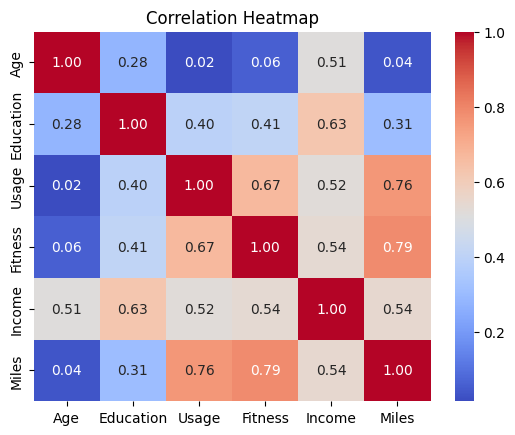

In [102]:
sns.heatmap(df.corr(numeric_only =True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

 **Observation**

• There is a weak positive correlation between age and income.

• There is a weak positive correlation between education and usage.

• There is a moderate positive correlation between usage and fitness.

• There is a weak positive correlation between income and miles.

# **Business Insights based on Non-Graphical and Visual Analysis:**

*   The dataset comprises various demographic and behavioral attributes of customers, including
age, gender, education, marital status, usage patterns, fitness levels, income, and miles run.
*   Customers seem to be predominantly young adults and middle-aged adults.
*   Most customers are partnered with varying levels of education and fitness.
*   There is a mix of income levels, with some customers falling into the middle-income bracket
while others are in the high-income bracket.
*  Usage patterns vary, with some customers engaging in low, moderate, or high levels of activity.

# **Comments on the range of attributes:**


*   Age ranges from Young adults to Mid-aged adults suggesting a diverse customers in terms of age.
*   Gender is evenly distributed between male and female.
*   Education levels range from 12 to 21(Educated and Highly Educated).
*   Marital status includes both single and partnered individuals.
*    Usage, fitness, and income levels vary across the dataset.
*   Miles run range from 47 to 200.


# **Comments on the distribution of the variables and relationship between them:**

*   Fitness levels seem to correlate positively with usage, indicating that customers with higher
fitness levels may engage in more activity.
*   Age and usage have a positive correlation, with younger customers potentially engaging in more
activity.

# **Recommendations - Actionable items for business :**
**Segmentation :** Divide customers into segments based on age, income, usage patterns, and fitness
levels to tailor marketing strategies and product offerings.

**Personalized Marketing :** Utilize customer data to create personalized marketing campaigns that
resonate with different segments.

**Product Development:** Develop products or services targeting specific segments, such as high intensity workouts for younger, more fitness-conscious customers or beginner-friendly programs for
older adults.

**Customer Engagement :** Implement seasonal offers to encourage customer engagement and
retention.

**Partnerships :** Form partnerships with fitness influencers or organizations to expand brand reach and
credibility within the target market segments.

**Feedback Collection :** Continuously collect feedback from customers to understand their evolving
needs and preferences, allowing for timely adjustments to product offerings and marketing strategies.